1.1. Sử dụng dữ liệu bán hàng 'supermarket_sales_vn.csv':
Vẽ biểu đồ cột, pie về tần số, tuần suất đơn hàng theo
− Địa phương (HN, SG, ĐN)
− Giới tính

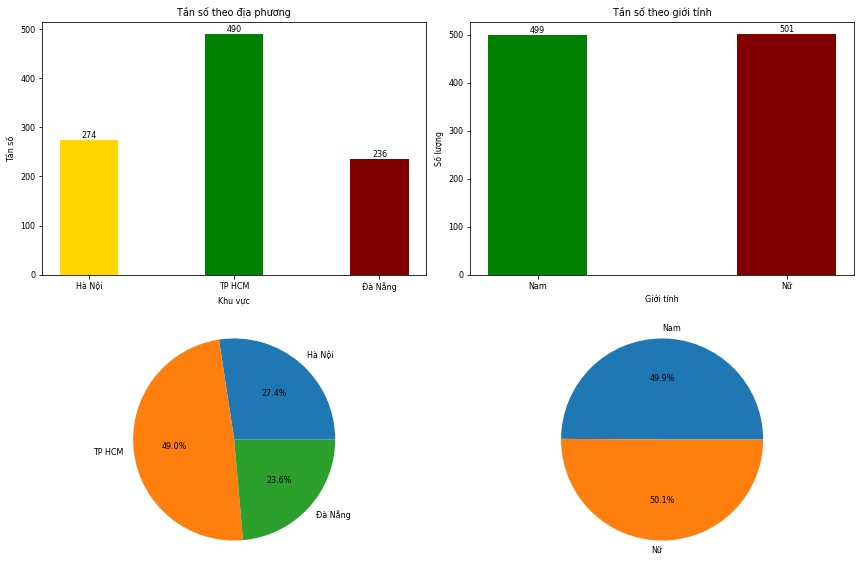

In [9]:
#Check directory
%pwd
#import module
import csv, os
import matplotlib.pyplot as plt
data =[]
with open('data/supermarket_sales_vn.csv', 'r',encoding="utf8") as f:
    fcsv = csv.reader(f)
    next(fcsv)
    for i in fcsv:
        data.append(i)
area = [i[1]for i in data]
sex = [i[3]for i in data]
area_obj = {i: [area.count(i), 100*area.count(i)/len(area)]for i in set(area)}
sex_obj = {i: [sex.count(i), 100*sex.count(i)/len(sex)]for i in set(sex)}
#Create fig
fig,axes = plt.subplots(2, 2, figsize=(12,8), constrained_layout=False)
#location
ax1 = plt.subplot(2,2,1)
areas = list(area_obj.keys())
area_tanso = [i[0]for i in list(area_obj.values())]
#Bar_area
colors = 'gold','green','maroon'
plt.bar(areas, area_tanso, color =colors,
        width = 0.4)
#add label
for i in range(len(areas)):
    plt.text(i, area_tanso[i]+4, area_tanso[i], ha = 'center')
plt.xlabel("Khu vực")
plt.ylabel("Tần số")
plt.title("Tần số theo địa phương")
#sex
ax2 = plt.subplot(2,2,2)
sex = list(sex_obj.keys())
sex_tanso = [i[0]for i in list(sex_obj.values())]
#Bar_sex
colors = 'green','maroon'
plt.bar(sex, sex_tanso, color =colors,
        width = 0.4)
for i in range(len(sex)):
    plt.text(i, sex_tanso[i]+4, sex_tanso[i], ha = 'center')
plt.xlabel("Giới tính")
plt.ylabel("Số lượng")
plt.title("Tần số theo giới tính")
#Pie_area
ax3 = plt.subplot(2,2,3)
plt.pie(area_tanso, autopct='%1.1f%%',labels=areas)
#Pie_sex
ax4 = plt.subplot(2,2,4)
plt.pie(sex_tanso, autopct='%1.1f%%',labels=sex)
#Show
plt.tight_layout()
plt.show()  

Dựa trên dữ liệu khảo sát:
Theo biểu đồ, khu vực hồ chí minh có đơn hàng bán chạy nhất với số đơn hàng là 490 tương ứng 49% tổng số đơn hàng. Khu vực hà nội và đà nẵng có số đơn ngang nhau. Nhu cầu mua hàng ngang nhau giữa người nam và người nữ.

1.2. Vẽ biểu đồ histogram về phân bố giá trị đơn hàng, rating
− Phân bố chung
− Theo giới tính, theo địa phương

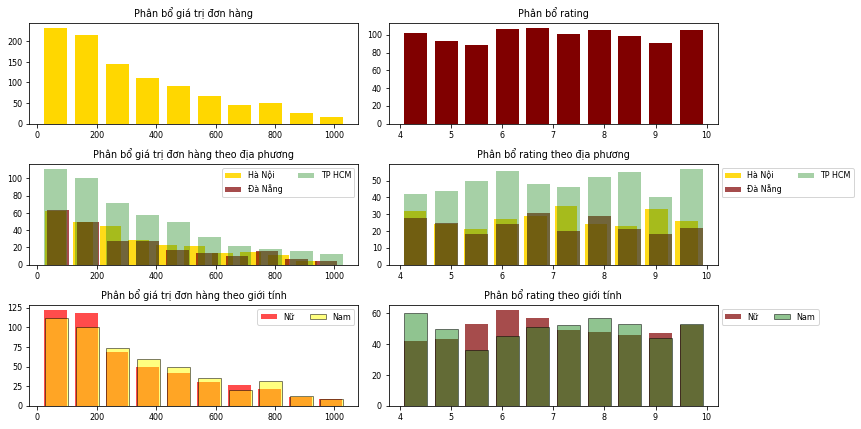

In [10]:
area = [i[1]for i in data]
sex = [i[3]for i in data]
donhang = [float(i[8]) for i in data]
rating = [float(i[13]) for i in data]
#Don hang theo dia phuong
donhang_area = [[i,j]for i,j in zip(area,donhang)]
donhang_hn = [donhang_area[i][1] for i in range(len(donhang_area)) if donhang_area[i][0] == 'Hà Nội']
donhang_dn = [donhang_area[i][1] for i in range(len(donhang_area)) if donhang_area[i][0] == 'Đà Nẵng']
donhang_hcm = [donhang_area[i][1] for i in range(len(donhang_area)) if donhang_area[i][0] == 'TP HCM']
#Don hang theo gioi tinh
donhang_sex = [[i,j]for i,j in zip(sex,donhang)]
donhang_nam = [donhang_sex[i][1] for i in range(len(donhang_sex)) if donhang_sex[i][0] == 'Nữ']
donhang_nu = [donhang_sex[i][1] for i in range(len(donhang_sex)) if donhang_sex[i][0] == 'Nam']
#Rating theo dia phuong
rating_area = [[i,j]for i,j in zip(area,rating)]
rating_hn = [rating_area[i][1] for i in range(len(rating_area)) if rating_area[i][0] == 'Hà Nội']
rating_dn = [rating_area[i][1] for i in range(len(rating_area)) if rating_area[i][0] == 'Đà Nẵng']
rating_hcm = [rating_area[i][1] for i in range(len(rating_area)) if rating_area[i][0] == 'TP HCM']
#Rating theo gioi tinh
rating_sex = [[i,j]for i,j in zip(sex,rating)]
rating_nam = [rating_sex[i][1] for i in range(len(rating_sex)) if rating_sex[i][0] == 'Nữ']
rating_nu = [rating_sex[i][1] for i in range(len(rating_sex)) if rating_sex[i][0] == 'Nam']
# plt.hist(donhang_hn, bins=10, rwidth=0.75, facecolor='red', alpha=0.75)
fig,axes = plt.subplots(3, 2, figsize=(12,6), constrained_layout=False)
ax1 = plt.subplot(3,2,1)
plt.hist(donhang, bins = 10,rwidth=0.75, color = 'gold')
plt.title("Phân bổ giá trị đơn hàng")
ax2 = plt.subplot(3,2,2)
plt.hist(rating, bins = 10,rwidth=0.75, color = 'maroon')
plt.title("Phân bổ rating")
ax3 = plt.subplot(3,2,3)
plt.hist(donhang_hn, bins = 10,rwidth=0.75, color = 'gold',alpha=.9)
plt.hist(donhang_dn, bins = 10,rwidth=0.75, color = 'maroon',alpha=.7)
plt.hist(donhang_hcm, bins = 10,rwidth=0.75, color = 'forestgreen',alpha=.4)
plt.legend(["Hà Nội", "Đà Nẵng","TP HCM"],bbox_to_anchor =(1, 1), ncol = 2)
plt.title("Phân bổ giá trị đơn hàng theo địa phương")
ax4 = plt.subplot(3,2,4)
plt.hist(rating_hn, bins = 10,rwidth=0.75, color = 'gold',alpha=.9)
plt.hist(rating_dn, bins = 10,rwidth=0.75, color = 'maroon',alpha=.7)
plt.hist(rating_hcm, bins = 10,rwidth=0.75, color = 'forestgreen',alpha=.4)
plt.legend(["Hà Nội", "Đà Nẵng","TP HCM"],bbox_to_anchor =(1, 1), ncol = 2)
plt.title("Phân bổ rating theo địa phương")
ax5 = plt.subplot(3,2,5)
plt.hist(donhang_nu, bins = 10,rwidth=0.75,alpha=.7, color = 'red')
plt.hist(donhang_nam, bins = 10,rwidth=0.75,alpha=.5,edgecolor='black', color = 'yellow')
plt.legend(["Nữ", "Nam"],bbox_to_anchor =(1, 1), ncol = 2)
plt.title("Phân bổ giá trị đơn hàng theo giới tính")
ax6 = plt.subplot(3,2,6)
plt.hist(rating_nu, bins = 10,rwidth=0.75,alpha=.7, color = 'maroon')
plt.hist(rating_nam, bins = 10,rwidth=0.75,alpha=.5,edgecolor='black', color = 'forestgreen')
plt.legend(["Nữ", "Nam"],bbox_to_anchor =(1, 1), ncol = 2)
plt.title("Phân bổ rating theo giới tính")
plt.tight_layout()
plt.show()

Dựa trên biểu đồ phân bổ chung, đơn hàng có giá trị dưới 200 nghìn có số đơn hàng lớn nhất. Và đơn hàng giá trị càng cao thì số lượng càng giảm. Về đánh giá qua thông số rating, thì thang điểm chấm nằm trong khoảng 4 đến dưới 10; và mức thang chấm khá đồng đều giữa các mức điểm.
- Về giá trị đơn hàng, đơn hàng tập trung mua ở HCM rất cao, và chủ yếu dưới 200 nghìn đồng. Còn khu vực đà nẵng và khu vực hà nội có sự tương đồng không chênh lệch về sức mua. Tuy nhiên, ở đà nẵng thì mua nhiều hơn ở khoảng giá trên 200 ngàn và dưới 300 ngàn. Còn khu vực HN thì sức mua cao hơn với giá trị đơn hàng từ 300 ngàn trở lên. Khi phân chia theo giới tính, phụ nữ thường mua hàng dưới 200 ngàn, còn nam giới đơn hàng trên 200 ngàn sẽ mua nhiều hơn so với nữ mặc dù chênh lệch không lớn.
- Về đánh giá thang điểm, người HCM đánh giá nhiều nhất và mức độ hài lòng khá đều ở mức 6-8 điểm. Người HN và ĐN số lượng đánh giá ít hơn, và kinh doanh hà nội thì khách hàng hài lòng cao hơn so với khách mua ở đà nẵng. Khi phân chia theo giới tính, nam giới có mức độ hài lòng cao hơn so với nữ giới thông qua việc thang điểm cao chủ yếu là nam giới. Nữ giới chấm chủ yêu mức trên 5 đến dưới 7 điểm, thể hiện mức chưa hài lòng về sản phẩm.

1.3. Vẽ biểu đồ scatter về mối liên hệ giữa giá trị đơn hàng và rating

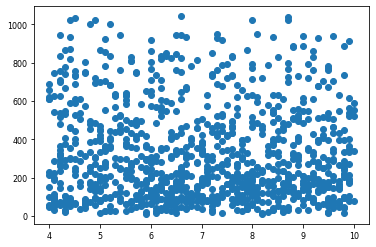

In [11]:
plt.scatter(rating,donhang)
plt.show()

Đơn hàng tập trung chủ yếu dưới 200 nghìn và phân bố đều ở mức điểm chấm từ 5 đến 8 điểm. Với những đơn hàng giá trị cao, thì mức chưa hài lòng từ 4 đến dưới 8 điểm nhiều hơn, thể hiện hàng càng giá trị cao thì khách hàng càng khó tính hơn trong đánh giá sản phẩm.

1.4. Vẽ biểu đồ tree-map cho các mặt hàng ('Product line')

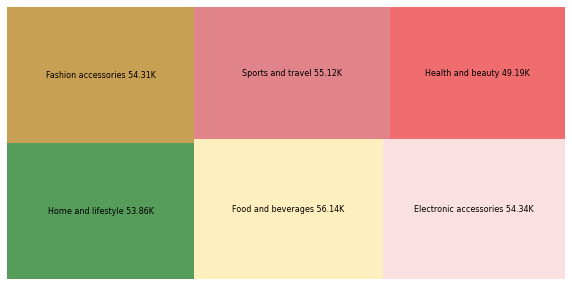

In [12]:
# %pip install squarify
import squarify
lb1,lb2,lb3,lb4,lb5,lb6 = 0,0,0,0,0,0
labels = [i[4]for i in data]
for i in range(len(data)):
    if labels[i] == list(set(labels))[0]:
        lb1+=donhang[i]
    elif labels[i] == list(set(labels))[1]:
        lb2+=donhang[i]
    elif labels[i] == list(set(labels))[2]:
        lb3+=donhang[i]
    elif labels[i] == list(set(labels))[3]:
        lb4+=donhang[i]
    elif labels[i] == list(set(labels))[4]:
        lb5+=donhang[i]
    elif labels[i] == list(set(labels))[5]:
        lb6+=donhang[i]
volume = [lb1,lb2,lb3,lb4,lb5,lb6]
labels = [f'{list(set(labels))[0]} {round(lb1/1000,2)}K',
          f'{list(set(labels))[1]} {round(lb2/1000,2)}K',
          f'{list(set(labels))[2]} {round(lb3/1000,2)}K',
          f'{list(set(labels))[3]} {round(lb4/1000,2)}K',
          f'{list(set(labels))[4]} {round(lb5/1000,2)}K',
          f'{list(set(labels))[5]} {round(lb6/1000,2)}K']
color_list = ['#0f7216', '#b2790c', '#ffe9a3',
              '#f9d4d4', '#d35158', '#ea3033']
plt.rc('font', size=8)
fig = plt.figure(figsize=(10,5))
squarify.plot(sizes=volume, label=labels,
              color=color_list, alpha=0.7)

plt.axis("off")
plt.show()

Các mặt hàng bán ra, người mua mua khá đều giữa các loại sản phẩm, chênh lệnh về tổng doanh thu giữa các loại sản phẩm là không cao. Mặt hàng 'food and beverages' đạt doanh số cao nhất và thấp nhất về doanh số là mặt hàng 'health and beauty'. Điều này cũng dễ hiểu khi đồ ăn người mua dùng thường xuyên và quay vòng nhanh do tính chất sản phẩm, trong khi hàng chăm sóc sức khỏe thì thời gian dùng sản phẩm lâu hơn rất nhiều và tốc độ quay vòng cũng thấp hơn do vòng đời cao hơn.